In [5]:
# Importing all the required libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as  pd
from sklearn import datasets

#For Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#For KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#For Random Forest
from sklearn.ensemble import RandomForestClassifier

#For XGBOOST
import xgboost as xgb

In [6]:
# Loading the dataset
bc = datasets.load_breast_cancer()

In [7]:
# Separating the data and target values
X = bc.data[:, :]
y = (bc.target != 0)
print(X[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [8]:
# The data is loaded on to a dataframe
df = pd.DataFrame(bc.data, columns = bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Added the Outcomes to the Dataframe
df['Result'] = pd.DataFrame(bc.target)
df.sample()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
480,12.16,18.03,78.29,455.3,0.09087,0.07838,0.02916,0.01527,0.1464,0.06284,...,27.87,88.83,547.4,0.1208,0.2279,0.162,0.0569,0.2406,0.07729,1


## Exploratory Data Analysis

In [12]:
print("The number of rows and columns in the training data:", df.shape)

The number of rows and columns in the training data: (569, 31)


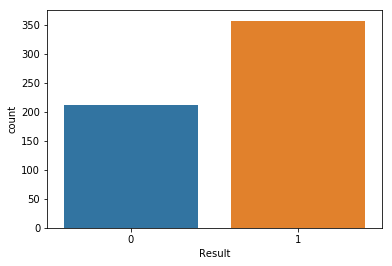

In [16]:
sns.countplot(df['Result'])
# we see that there are more benign than malignant

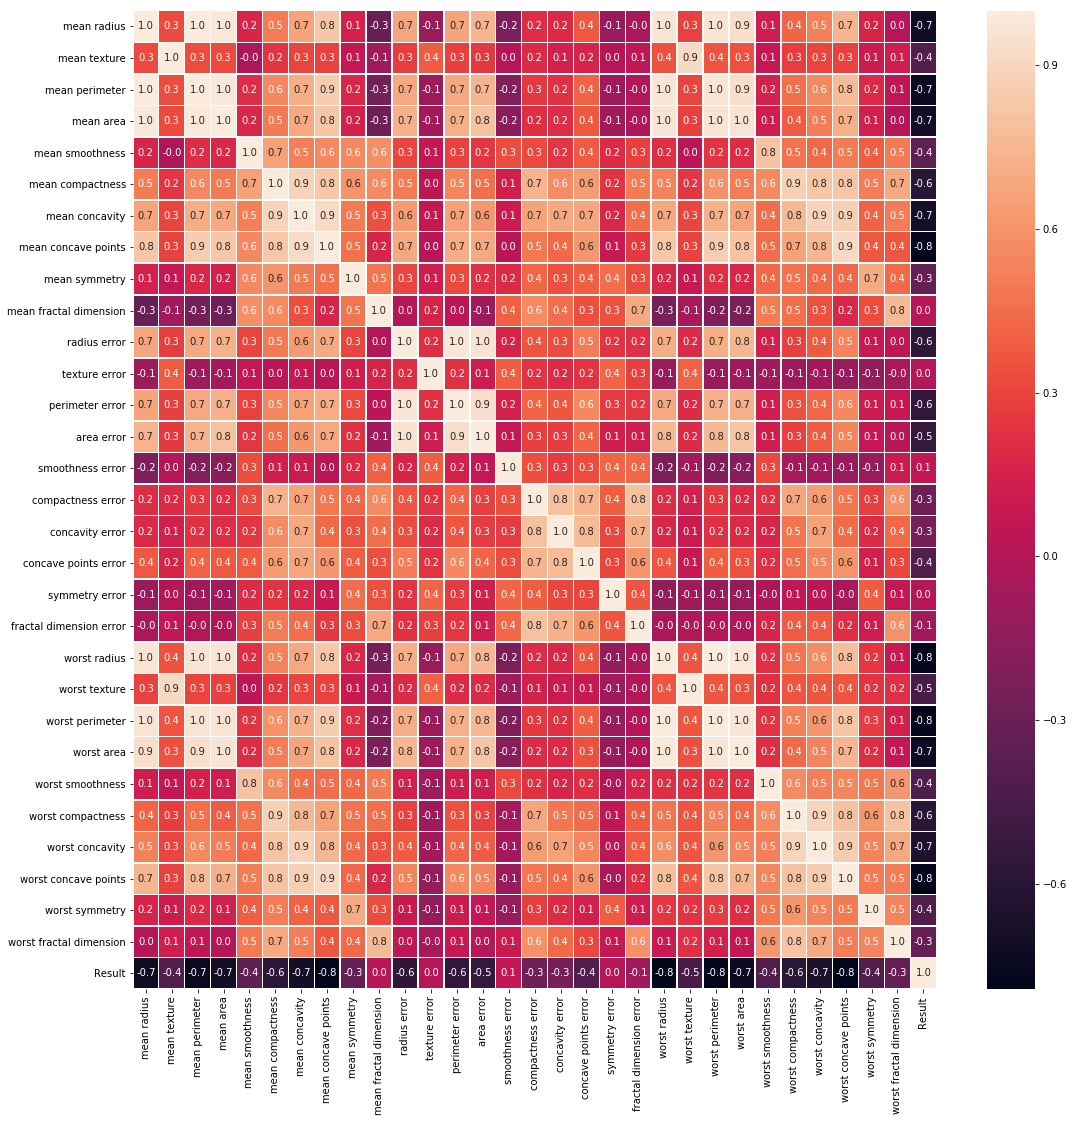

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Splitting the data into training and testing

In [18]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result,is_train
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,True
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,False
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,True
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,False
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,True


In [19]:
train, test = df[df["is_train"]== True], df[df['is_train']==False]
print('The training data:',len(train))
print('The testing data:',len(test))

The training data: 448
The testing data: 121


In [20]:
# ALl the features 
features = df.columns[:30]
features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [21]:
# Creating a list of the target values (its useful later)
y = []
for i in train['Result']:
    y.append(i)

# Logistic Regression

In [22]:
model_1 = LogisticRegression()
model_1.fit(train[features],y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
pred_1 = model_1.predict(test[features])

In [24]:
y2 = []
for i in test['Result']:
    y2.append(i)

In [25]:
from sklearn import metrics
print(metrics.classification_report(pred_1, y2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.97      0.97      0.97        88

   micro avg       0.95      0.95      0.95       121
   macro avg       0.94      0.94      0.94       121
weighted avg       0.95      0.95      0.95       121



# KNN

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn_score = cross_val_score(knn,bc.data,bc.target,cv=5,scoring='accuracy')
knn_accuracy = round(knn_score.mean(),3)

In [27]:
knn_score2 = cross_val_score(knn,bc.data,bc.target,cv=5,scoring='recall')
knn_recall = round(knn_score2.mean(),3)

In [28]:
knn_score3 = cross_val_score(knn,bc.data,bc.target,cv=5,scoring='precision')
knn_precision = round(knn_score3.mean(),3)

In [29]:
print('KNN Accuracy:', knn_accuracy, '\nKNN Recall:', knn_recall, '\nKNN Precision:', knn_precision )

KNN Accuracy: 0.928 
KNN Recall: 0.961 
KNN Precision: 0.929


# Random Forest

In [30]:
model_3 = RandomForestClassifier(n_jobs=2, random_state=0)
model_3.fit(train[features],y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
pred_3 = model_3.predict(test[features])
pred_3

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [32]:
pred_3a = bc.target_names[model_3.predict(test[features])]

In [33]:
pred_3a[:35]

array(['malignant', 'malignant', 'malignant', 'malignant', 'malignant',
       'malignant', 'benign', 'malignant', 'malignant', 'malignant',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'malignant',
       'benign', 'malignant', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant'], dtype='<U9')

In [34]:
pd.crosstab(test['Result'],pred_3a,rownames=['Actual '],colnames = ['Predicted '])

Predicted,benign,malignant
Actual,,
0,3,30
1,84,4


In [35]:
y2 = []
for i in test['Result']:
    y2.append(i)

In [36]:
from sklearn import metrics
print(metrics.classification_report(pred_3, y2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.95      0.97      0.96        87

   micro avg       0.94      0.94      0.94       121
   macro avg       0.93      0.92      0.93       121
weighted avg       0.94      0.94      0.94       121



# XGBoost

In [37]:
model_4 = xgb.XGBClassifier()
model_4.fit(train[features],y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [38]:
pred_4 = model_4.predict(test[features])
pred_4

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [39]:
pd.crosstab(test['Result'],pred_4,rownames=['Actual '],colnames = ['Predicted '])

Predicted,0,1
Actual,,
0,31,2
1,2,86


In [40]:
from sklearn import metrics
print(metrics.classification_report(pred_4, y2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.98      0.98      0.98        88

   micro avg       0.97      0.97      0.97       121
   macro avg       0.96      0.96      0.96       121
weighted avg       0.97      0.97      0.97       121



In [41]:
from sklearn.metrics import accuracy_score
print('The accuracy of Logistic Regression is', accuracy_score(pred_1,y2))
print('The accuracy of KNN is',knn_accuracy)
print('The accuracy of Random Forest is',accuracy_score(pred_3,y2))
print('The accuracy of XGBoost is',accuracy_score(pred_4,y2))

The accuracy of Logistic Regression is 0.9504132231404959
The accuracy of KNN is 0.928
The accuracy of Random Forest is 0.9421487603305785
The accuracy of XGBoost is 0.9669421487603306


In [42]:
all_acc = [accuracy_score(pred_1,y2), knn_accuracy, accuracy_score(pred_3,y2), accuracy_score(pred_4,y2)]
left = [1,2,3,4]
tick_label = ['Log', "KNN", 'RF', "XGB"]
# plt.bar(left,all_acc, tick_label = tick_label, 
#         width = 0.8, color = ['red', 'blue']) 
all_a = pd.DataFrame(all_acc, index = left)

In [43]:
all_a['Label'] = tick_label

all_a[0] = all_a[0]*100

all_a = all_a.rename(columns = { 0: 'Scores'})

all_a.groupby(by='Label').max()

,Scores
Label,
KNN,92.800000
Log,95.041322
RF,94.214876
XGB,96.694215


## It appears that XGBoost gives us the most accurate results and can be used to accurately predict the given problem.